<a href="https://colab.research.google.com/github/seohyeon-jeong/basic_machinelearning/blob/main/PMP_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EC%8B%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# colab과 google Drive 연동을 위한 인증 및 네트워크 디렉토리 마운트
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import os 

print(os.getcwd())

/content


### 판다스 내장 그래프 도구 활용

In [5]:
df = pd.read_excel('/content/drive/My Drive/data/pandasML_black/남북한발전전력량.xlsx')

In [6]:
print(df.describe())

       전력량 (억㎾h) 발전 전력별 1990 1991 1992 1993  ... 2011  2012 2013 2014 2015 2016
count          2      9    9    9    9    9  ...    9     9    9    9    9    9
unique         2      5    8    8    8    8  ...    8     9    9    9    9    9
top           남한    원자력    -    -    -    -  ...    -  1503  139   78  190  239
freq           1      2    2    2    2    2  ...    2     1    1    1    1    1

[4 rows x 29 columns]


In [7]:
print(df.shape)

(9, 29)


In [8]:
# df.iloc[행 인덱스 integer/integer형의 슬라이싱, 열 인덱스 integer/integer형의 슬라이싱] : 위치 기반 인덱싱

df_ns = df.iloc[[0,5], 3:]              # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South', 'North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int)  # 열 이름의 자료형을 정수형으로 변경

print(df_ns.head())

       1991  1992  1993  1994  1995  1996  ...  2011  2012  2013  2014  2015  2016
South  1186  1310  1444  1650  1847  2055  ...  4969  5096  5171  5220  5281  5404
North   263   247   221   231   230   213  ...   211   215   221   216   190   239

[2 rows x 26 columns]


#### 선 그래프 df.plot()

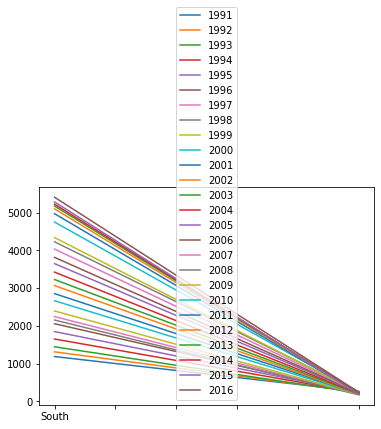

In [9]:
# 선 그래프 
df_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230


AxesSubplot(0.125,0.125;0.775x0.755)


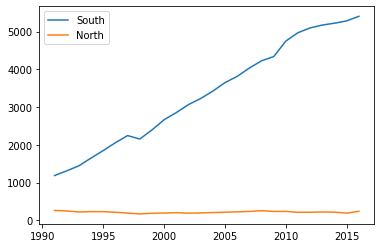

In [10]:
# 시간의 흐름에 따른 연도별 발전량 변화 추이를 보기 위해 연도값을 x축에 표시 = transpose
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')
print(tdf_ns.plot())

#### 막대 그래프 df.plot(kind='bar')

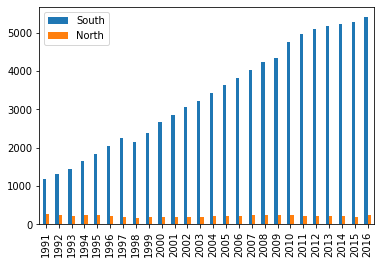

In [11]:
tdf_ns.plot(kind='bar')

#### 히스토그램 df.plot(kind='hist')

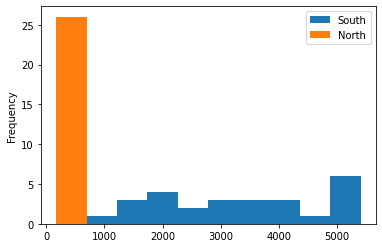

In [12]:
tdf_ns.plot(kind='hist')

#### 산점도 df.plot(kind='scatter')

In [13]:
df = pd.read_csv('/content/drive/My Drive/data/pandasML_black/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement','horsepower',
              'weight','acceleration','model year','origin','name']

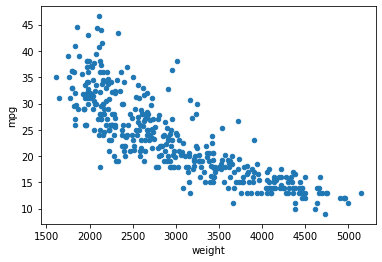

In [14]:
df.plot(x='weight', y='mpg', kind='scatter')

#### 박스 플롯 df.plot(kind='box')

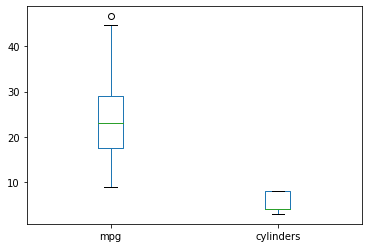

In [15]:
df[['mpg','cylinders']].plot(kind='box')

### Matplotlib - 기본 그래프 도구

In [16]:
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel('/content/drive/My Drive/data/pandasML_black/시도별 전출입 인구수.xlsx', header=0) #.fillna(0)
# fillna : 결측치를 해당 값으로 변경, header : 디폴트는 0, 헤더가 없으면 None

In [18]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [19]:
# '전출지별' 열의 결손치 : 누락데이터가 들어있는 행의 바로 앞에 위치한 행의 데이터 값으로 채우기
df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,363,354,566,475,471,622,656,634,621,505,502,503,520,547,593,517,532,562,593,648,615,781,743,701,622,788,628,633,758,722,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,2722,2178,2790,2926,2683,3284,3068,2883,2151,1955,1736,1512,1536,1474,1565,1801,1415,1413,1487,1439,1492,1637,1564,1304,1293,1299,1226,1234,1217,1316,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,1009,818,1041,702,735,711,719,616,725,832,572,599,662,683,692,712,675,718,698,781,730,886,794,815,793,757,746,828,828,838,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,1331,1290,2312,1340,1744,1937,2093,1585,1548,1622,1623,1512,1368,1385,1470,1569,1609,1547,1760,1293,1185,1466,1360,1326,1587,1495,1533,1503,1543,1614,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [20]:
# 서울에서 다른 지역으로 이동한 데이터만 추출해서 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')
print(type(mask))

<class 'pandas.core.series.Series'>


In [21]:
df_seoul = df[mask] # 시리즈인 mask를 df로 변환
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,16281,19028,19496,17689,20291,18790,18989,18310,16685,19470,17463,16154,15163,14727,15557,14005,14366,14871,14277,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,4545,4413,4563,4105,4266,4085,4456,4252,4227,4656,4801,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,297539,252073,320174,400875,352238,390265,412535,405220,415174,412933,473889,384714,428344,502584,542204,599411,520566,495454,407050,471841,435573,499575,516765,457656,400206,414621,449632,431637,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,26591,25208,25215,23244,21384,24987,25221,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [22]:
df_seoul = df_seoul.drop(['전출지별'],axis=1) # axis = 1은 열, axis = 0은 행 (디폴트는 0)
df_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,16281,19028,19496,17689,20291,18790,18989,18310,16685,19470,17463,16154,15163,14727,15557,14005,14366,14871,14277,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,4545,4413,4563,4105,4266,4085,4456,4252,4227,4656,4801,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,297539,252073,320174,400875,352238,390265,412535,405220,415174,412933,473889,384714,428344,502584,542204,599411,520566,495454,407050,471841,435573,499575,516765,457656,400206,414621,449632,431637,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,26591,25208,25215,23244,21384,24987,25221,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [23]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) 
# inplace = True : Whether to return a new DataFrame. If True then value of copy is ignored. (False:default)

# df.set_index() : 하나 이상의 기존 열 또는 배열 (올바른 길이)을 사용하여 DataFrame 인덱스 (행 레이블)를 설정
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,16281,19028,19496,17689,20291,18790,18989,18310,16685,19470,17463,16154,15163,14727,15557,14005,14366,14871,14277,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,4545,4413,4563,4105,4266,4085,4456,4252,4227,4656,4801,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,297539,252073,320174,400875,352238,390265,412535,405220,415174,412933,473889,384714,428344,502584,542204,599411,520566,495454,407050,471841,435573,499575,516765,457656,400206,414621,449632,431637,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [24]:
df_seoul.shape

(17, 48)

In [25]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

In [26]:
print(type(sr_one))

<class 'pandas.core.series.Series'>


#### 선 그래프 plt.plot( x축데이터, y축 데이터)

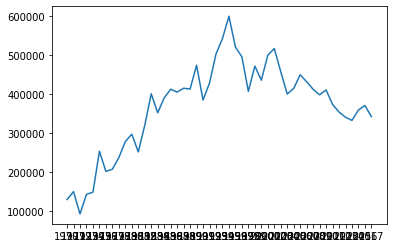

In [27]:
# 선그래프 
plt.plot(sr_one.index, sr_one.values)

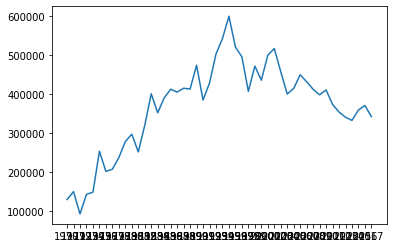

In [28]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one) # 시리즈 또는 df 객체를 plot() 함수에 직접 입력하는 것도 가능

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

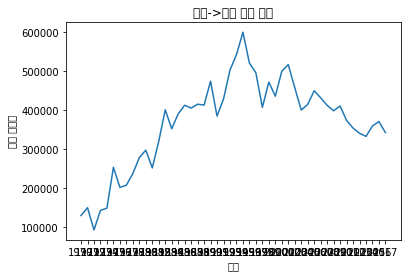

In [32]:
# 차트 제목, 축 이름 추가

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x축과 y축 데이터를 plot()에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울->경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

In [31]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

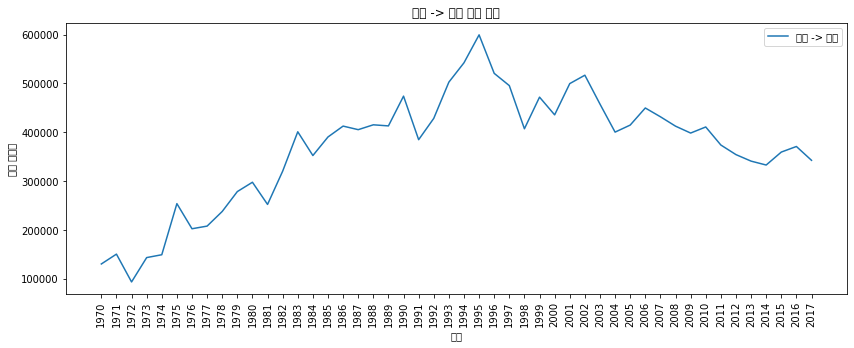

In [35]:
# 글씨가 서로 겹쳐서 잘 안보이는 문제 해결

# 서울에서 경디로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림사이즈 지정 (단위 : inch)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('인구 이동수')

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례 표시

plt.show()